## Lab 05, March 5 2019
## Lessons in Transparency ––  How Calibration Can be Gamed. 
Due March 12, 2019.

In this lab we will explore the comments and figures in Section 6 of the Corbett-Davies et al. paper, and see how calibration can be gamed to advantage or disadvantage a group by applying seemingly "neutral" decision thresholds.


In [1]:
# Making sure we have the libraries we need
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import beta
import seaborn as sns

To start off, let's learn a bit more about continuous distributions and what it means to sample from them. In particular, [here](https://bigdata-madesimple.com/how-to-implement-these-5-powerful-probability-distributions-in-python/) is a great resource on five important probability distributions, and how to use them. 
All these examples use the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) module which you should consult for documentation.

### Task 1: How to sample from a closed-form continuous probability distribution.
Your first task is to use the scipy.stats module (use the resources linked to above) to sample 100,000 times from a normal distribution with mean 0 and standard deviation 1. Then using [seaborn.distplot](https://seaborn.pydata.org/tutorial/distributions.html) plot the density distribution of this simulated data. 

In [2]:
# Your code for Task 1 here

##  Creating a simulated set of risk scores.

Now that we understand the notion of sampling from a continuous distribution, we will construct a fake set of risk scores by simulating from a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) (as the paper suggests). 

In [6]:
#parameters for the Beta distribution used in the paper
l = 10
phi = 0.2
n = 1000000

In [9]:
risk_scores = beta.rvs(l*phi, l * (1 - phi), size=1000000)

**Question**: What does the line of code **above** achieve?

Now we use seaborn to view the distribution of these fake risk scores. Compare this to the plot in the paper.

/Users/djm056/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


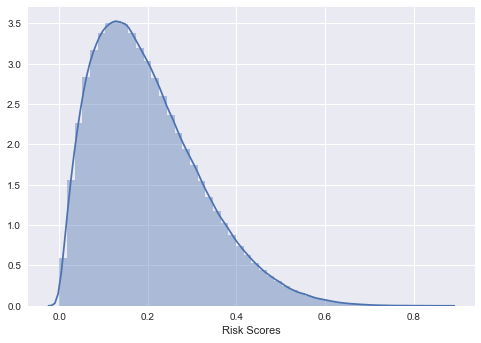

In [11]:
sns.distplot(risk_scores, axlabel = "Risk Scores")
sns.plt.show()

Now, assuming these are the true scores of a group an adversary is trying to favor, we will add noise to these risk scores as per the paper:
> We start by adding noise to the true scores (black curve) of the group that we wish to treat favorably — in the figure we use N(0, 0.5) noise.

### Task 2: Adding Noise.
Write code to add "noise" sampled from a Normal distribution with the required parameters to each element of **risk_scores**. Call this new array **noisy_risk_scores**.

In [16]:
# complete the line of code below
noisy_risk_scores = risk_scores + 

Let's look at the distribution of these noisy scores. Notice that they've become clustered around a mean with a Gaussian-like distribution.

/Users/djm056/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


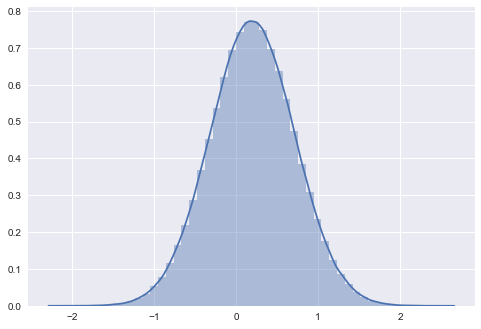

In [18]:
sns.distplot(noisy_risk_scores)

## Using noisy scores to make a prediction
Now we will use these noisy scores to make a prediction. Before doing so, we will determine the real target variable (Y). For the purpose of this exercise, we wil randomly come up with an outcome.

In [30]:
# samples uniformly between 0 and 1
s = np.random.uniform(0, 1, 1000000) 

# come with a decision rule that if the sampled number is less
# than the risk score then set the target for that risk score to
# 1, otherwise to 0.

outcome = s < risk_scores
target = 1*outcome

Now, we'll set up things for using these perturbed scores in Logistic Regression.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [27]:
lr = LogisticRegression()

In [28]:
#when fitting, fit() expects each element of features to be an array
features = noisy_risk_scores.reshape(-1,1)

## Task 3:
Now fit a logistic regression model to these features as per the paper:
> We then use the perturbed scores to predict the outcomes $y_i$ via a logistic regression model. 

Extract the prediction probabilites from the model to an array (say in the array **predict_from_noisy**). Then, using seaborn's **distplot** plot both the distribution of the original risk scores and these adjusted scores on the same plot.

In [33]:
# fit the model to "features" and "target"


## Task 4: Test calibration for the two risk scores.

Now plot the true probabilities of being positive for both risk scores. Before proceeding, think about the tasks you need to break this down into. You will need to divide risk scores into bins, and compute the proportion of true positives in each of these bins to draw the calibration plot.

### Question: How is the process you underwent in this lab related to redlining?